## Retail Sector Domain Analysis - Timeseries using RFM

### Business Problem

###### In Retail Sector, it is potential to unlock insights to win and retain customers, drive business efficiencies and ultimately improve performance in terms of sales and customer interest. Beyond the hype, retail organization are using advance analysis to do everything from understanding their customers to improve forecasting, driving better , faster results. Since the resources that a company has are limited, it is vital to find these customers and target them to win customer loyalty, drive business efficiencies and ultimately improve performance.

### Objective

### Variables

In [6]:
#import library functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xlrd
import datetime
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")


In [5]:
!pip install lifetimes

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47994 sha256=8d8f0a5078d6f242498678e1ea1ddc15b2fc51f86ac692ec09df2d1f102bede3
  Stored in directory: c:\users\anirudh mv\appdata\local\pip\cache\wheels\85\f5\d2\3ef47d3a836b17620bf41647222825b065245862d12aa62885
Successfully built autograd


In [7]:
#loading the dataset
data = pd.read_excel('C:/Users/Anirudh MV/Downloads/Retail-Ecommerce.xlsx', dtype= {'CustomerID': str})  
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [8]:
data.shape

(541909, 8)

In [9]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
data.isnull().sum()/data.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [11]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [13]:
data[data["CustomerID"].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice CustomerID         Country  
1443   2010-12-01 14:32:00       2.51        NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51        NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85        NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66        NaN  United Kingdom  
1447   2010-12-01 14:32:00       1.66        NaN  United Kingdom  
...                    ...        ...        ...             ...  
541536 2011-12-09 10:26:00       4.13        NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13        NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96        NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79        NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17        NaN  United Kingdom  

[133626 rows x 8 columns]

In [14]:
#drop the rows where customerID is null
data.dropna(axis = 0, subset = ["CustomerID"], inplace = True)

In [15]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
data.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  
5 2010-12-01 08:26:00       7.65      17850  United Kingdom  
6 2010-12-01 08:26:00       4.25      17850  United Kingdom  
7 2010-12-01 08:28:00       1.85      17850  United Kingdom  
8 2010-12-01 08:28:00       1.85      17850  United Kingdom  
9 2010-12-01 08:34:00       1.69      13047  United Kingdom

In [17]:
#creating the temporary data frame
temp_df = pd.DataFrame(data["Country"].value_counts())

In [18]:
temp_df.head(10)

Country
United Kingdom   361878
Germany            9495
France             8491
EIRE               7485
Spain              2533
Netherlands        2371
Belgium            2069
Switzerland        1877
Portugal           1480
Australia          1259

In [19]:
names  = temp_df.index

In [20]:
#checking for the occurence of most countries in our data
px.scatter(temp_df, y = "Country", color = names)

#### As you can see the United Kingdom has the max transcations as compared to other countries. The one here to note is that the "United Kingdom" is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class.

You can cross check the same after de-selecting the United Kingdom from the above chart and see how your axis transforms.

In [21]:
#Now let's check the total quantity and by country
data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10

Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109848
Australia           83653
Sweden              35637
Switzerland         29778
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

In [22]:
#checking for the average price by country

px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(), 
           y = "UnitPrice", size = "UnitPrice", title = "Average Price by Country", opacity = 0.48)

#### From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

In [23]:
#extracting unique country names
countries = data["Country"].unique()

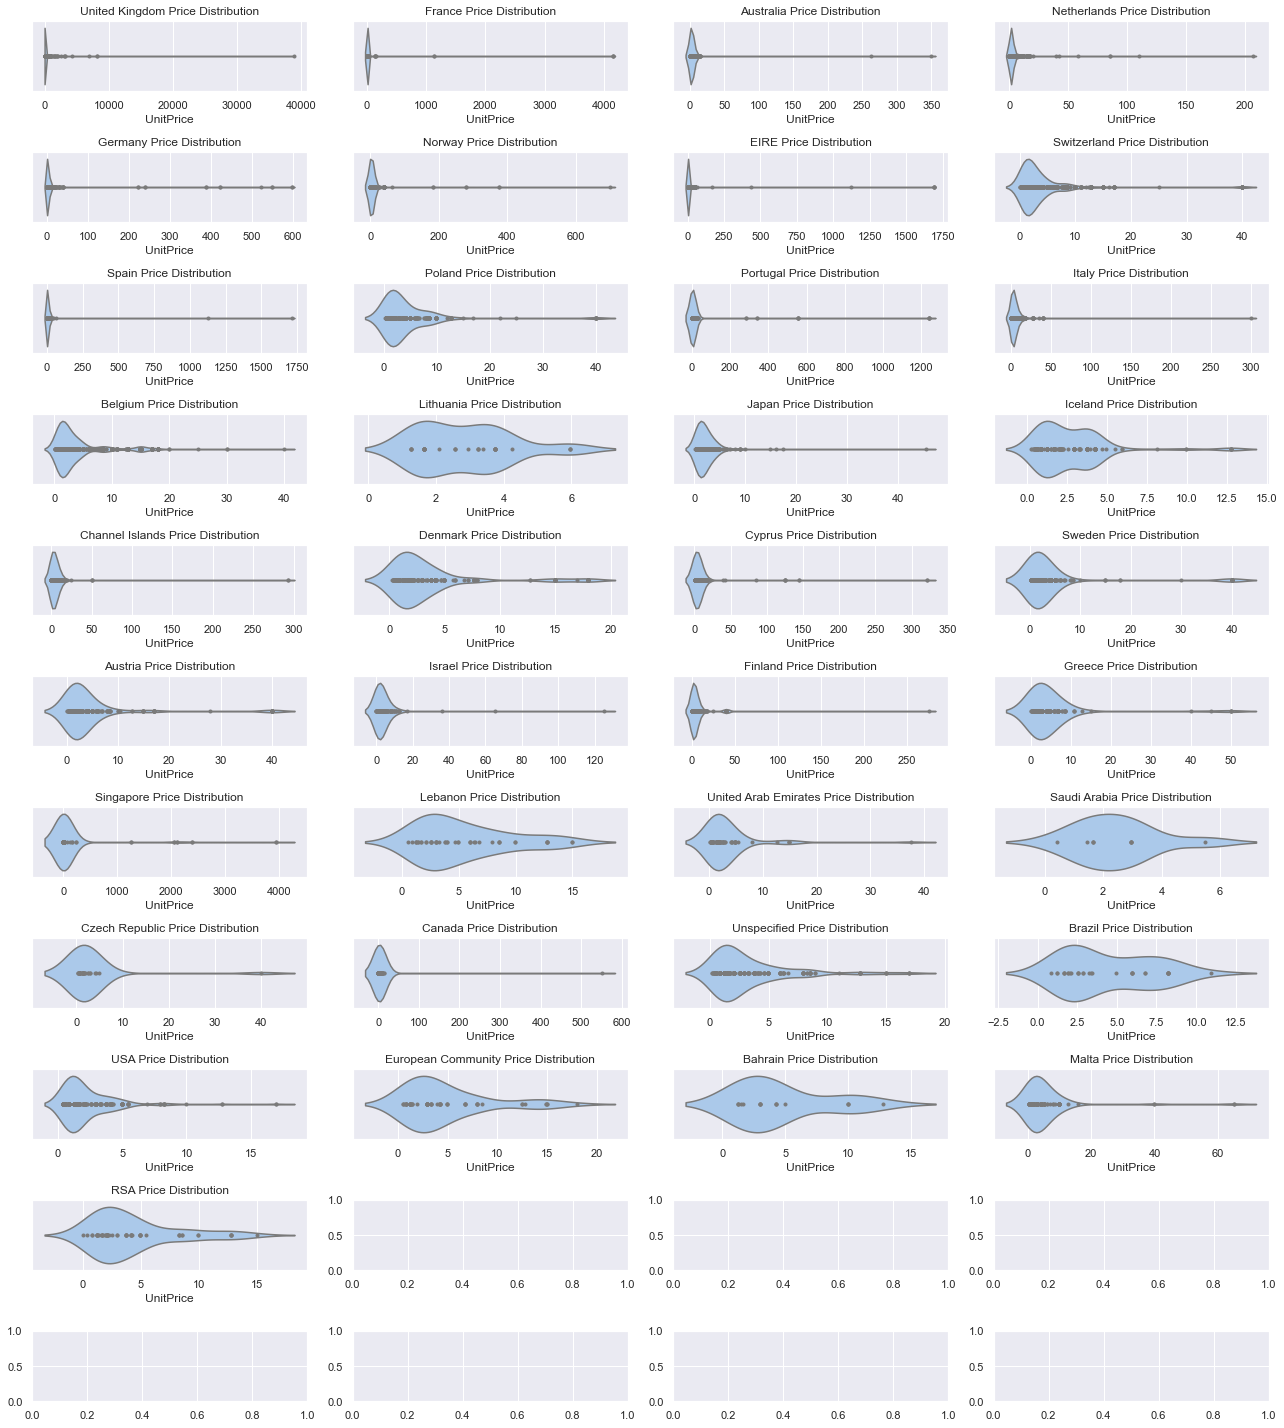

In [24]:
#plotting the violin plot for the data
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "UnitPrice", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

##### From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [25]:
#Total Number of Unique Invoices 
len(data["InvoiceNo"].unique())

22190

In [26]:
temp_invoice_df = data.groupby("InvoiceNo").sum()

In [27]:
temp_invoice_df.reset_index(inplace = True)

In [28]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

In [30]:
#Top 15 Invoices with average prices sorted from high to low
data.groupby(["InvoiceNo"]).mean().head(15).iloc[:, [1]].sort_values("UnitPrice", ascending = False)

UnitPrice
InvoiceNo           
536374     10.950000
536369      5.950000
536367      4.853333
536368      4.775000
536365      3.910000
536373      3.319375
536375      3.319375
536376      3.000000
536370      2.764500
536371      2.550000
536366      1.850000
536372      1.850000
536377      1.850000
536378      1.755263
536380      1.450000

#### I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number 536374 & 536369 has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [31]:
data[(data["InvoiceNo"] == 536374) | (data["InvoiceNo"] == 536369)]

InvoiceNo StockCode                 Description  Quantity  \
25    536369     21756    BATH BUILDING BLOCK WORD         3   
65    536374     21258  VICTORIAN SEWING BOX LARGE        32   

           InvoiceDate  UnitPrice CustomerID         Country  
25 2010-12-01 08:35:00       5.95      13047  United Kingdom  
65 2010-12-01 09:09:00      10.95      15100  United Kingdom

### INITIAL EDA INSIGHTS:
1) Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

2) If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

3) Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

4) There are total 22190 uniques purchased happend so far.

5) We have also observed some of the Invoices who have purchased most of the quantities within 1 year of span.

6) When it comes to the average spend there are 2 invoices with number 536374 and 536369 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

In [32]:
#Let's look at the data once again & see what else insights we can get from the data itself
data.head(15)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13    536367     22310              IVORY KNITTED MUG COSY          6   
14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   

           InvoiceDate  UnitPrice CustomerID         Country  
0  2010-12-01 08:26:00       2.55      17850  United Kingdom  
1  2010-12-01 08:26:00       3.39      17850  United Kingdom  
2  2010-12-01 08:26:00       2.75      17850  United Kingdom  
3  2010-12-01 08:26:00       3.39      17850  United Kingdom  
4  2010-12-01 08:26:00       3.39      17850  United Kingdom  
5  2010-12-01 08:26:00       7.65      17850  United Kingdom  
6  2010-12-01 08:26:00       4.25      17850  United Kingdom  
7  2010-12-01 08:28:00       1.85      17850  United Kingdom  
8  2010-12-01 08:28:00       1.85      17850  United Kingdom  
9  2010-12-01 08:34:00       1.69      13047  United Kingdom  
10 2010-12-01 08:34:00       2.10      13047  United Kingdom  
11 2010-12-01 08:34:00       2.10      13047  United Kingdom  
12 2010-12-01 08:34:00       3.75      13047  United Kingdom  
13 2010-12-01 08:34:00       1.65      13047  United Kingdom  
14 2010-12-01 08:34:00       4.25      13047  United Kingdom

### Exploratory Data Analysis

<AxesSubplot:xlabel='Description'>

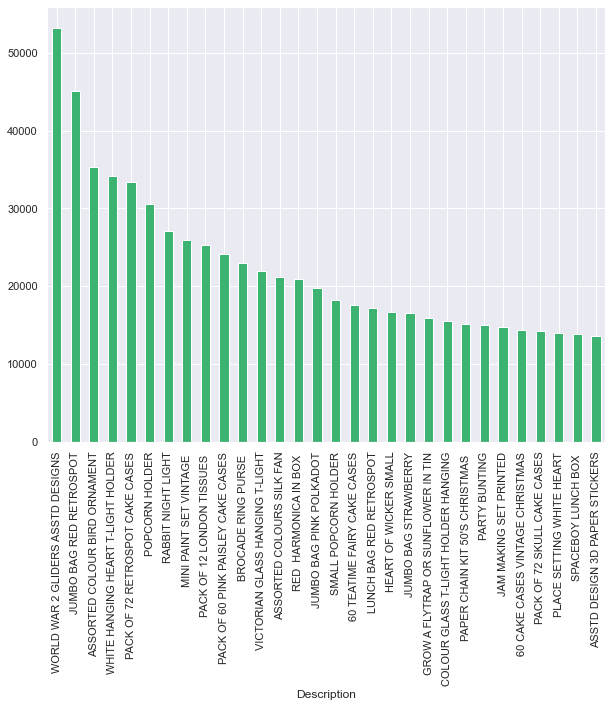

In [33]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')

In [34]:
##creating a data copy point
temp_data = data.copy()

In [35]:
temp_data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2010-12-01 08:26:00       2.55      17850  United Kingdom  
1      2010-12-01 08:26:00       3.39      17850  United Kingdom  
2      2010-12-01 08:26:00       2.75      17850  United Kingdom  
3      2010-12-01 08:26:00       3.39      17850  United Kingdom  
4      2010-12-01 08:26:00       3.39      17850  United Kingdom  
...                    ...        ...        ...             ...  
541904 2011-12-09 12:50:00       0.85      12680          France  
541905 2011-12-09 12:50:00       2.10      12680          France  
541906 2011-12-09 12:50:00       4.15      12680          France  
541907 2011-12-09 12:50:00       4.15      12680          France  
541908 2011-12-09 12:50:00       4.95      12680          France  

[406829 rows x 8 columns]

In [36]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [37]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [38]:
#renaming the data values using map function
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)

In [39]:
temp_data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  Month  \
0      2010-12-01 08:26:00       2.55      17850  United Kingdom     12   
1      2010-12-01 08:26:00       3.39      17850  United Kingdom     12   
2      2010-12-01 08:26:00       2.75      17850  United Kingdom     12   
3      2010-12-01 08:26:00       3.39      17850  United Kingdom     12   
4      2010-12-01 08:26:00       3.39      17850  United Kingdom     12   
...                    ...        ...        ...             ...    ...   
541904 2011-12-09 12:50:00       0.85      12680          France     12   
541905 2011-12-09 12:50:00       2.10      12680          France     12   
541906 2011-12-09 12:50:00       4.15      12680          France     12   
541907 2011-12-09 12:50:00       4.15      12680          France     12   
541908 2011-12-09 12:50:00       4.95      12680          France     12   

            Time  Year  Day  Quarter Day of Week  
0       08:26:00  2010    1        4   Wednesday  
1       08:26:00  2010    1        4   Wednesday  
2       08:26:00  2010    1        4   Wednesday  
3       08:26:00  2010    1        4   Wednesday  
4       08:26:00  2010    1        4   Wednesday  
...          ...   ...  ...      ...         ...  
541904  12:50:00  2011    9        4      Friday  
541905  12:50:00  2011    9        4      Friday  
541906  12:50:00  2011    9        4      Friday  
541907  12:50:00  2011    9        4      Friday  
541908  12:50:00  2011    9        4      Friday  

[406829 rows x 14 columns]

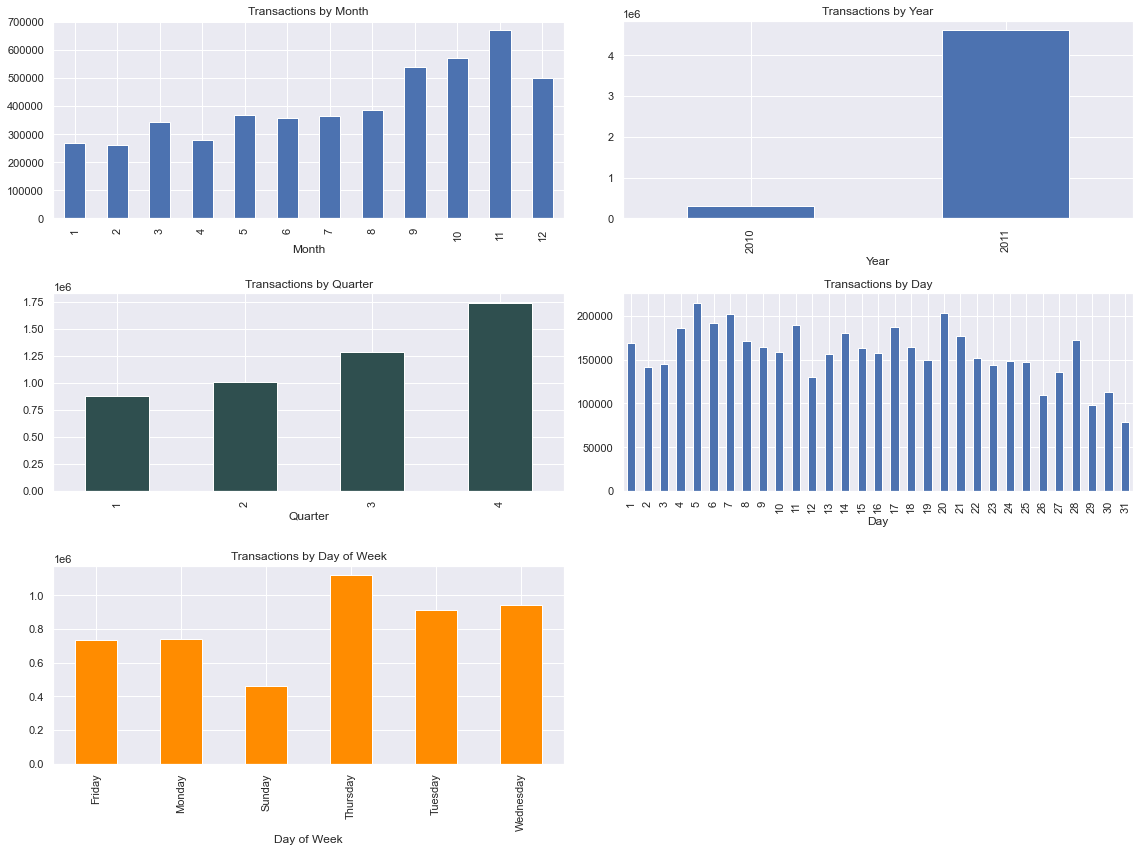

In [40]:
#Plotting the above data
plt.figure(figsize=(16,12))

plt.subplot(3,2,1)
temp_data.groupby("Month").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Month")

plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")

plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")

plt.subplot(3,2,4)
temp_data.groupby("Day").sum()["Quantity"].plot(kind = "bar")
#sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
#plt.axvline(7, color = 'r', linestyle = '--')
#plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")

plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

#### As we can see, in 2010 the transactions is quite low as compared to 2011. But as if now, we don't know the reason behind this so let's investigate why 2010 is low as compared to other.

In [41]:
print("Total Number of Countries in 2010: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2010: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2011: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2011: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))
print("--------------------------------------------")

Total Number of Countries in 2010: 23
Total Number of Transactions in 2010: 296362
--------------------------------------------
Total Number of Countries in 2011: 36
Total Number of Transactions in 2011: 4610526
--------------------------------------------


#### Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further

In [42]:
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [43]:
#checking for the countries which are available in  2010 but not in 2011.

no_cols = []

for i in (_2010):
    if i not in _2011:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Lithuania']


In [44]:
temp = data.groupby(["Country", "Description"]).sum()["Quantity"]

In [45]:
temp = pd.DataFrame(temp)

#### Top 8 Countries With Popular Products

In [46]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

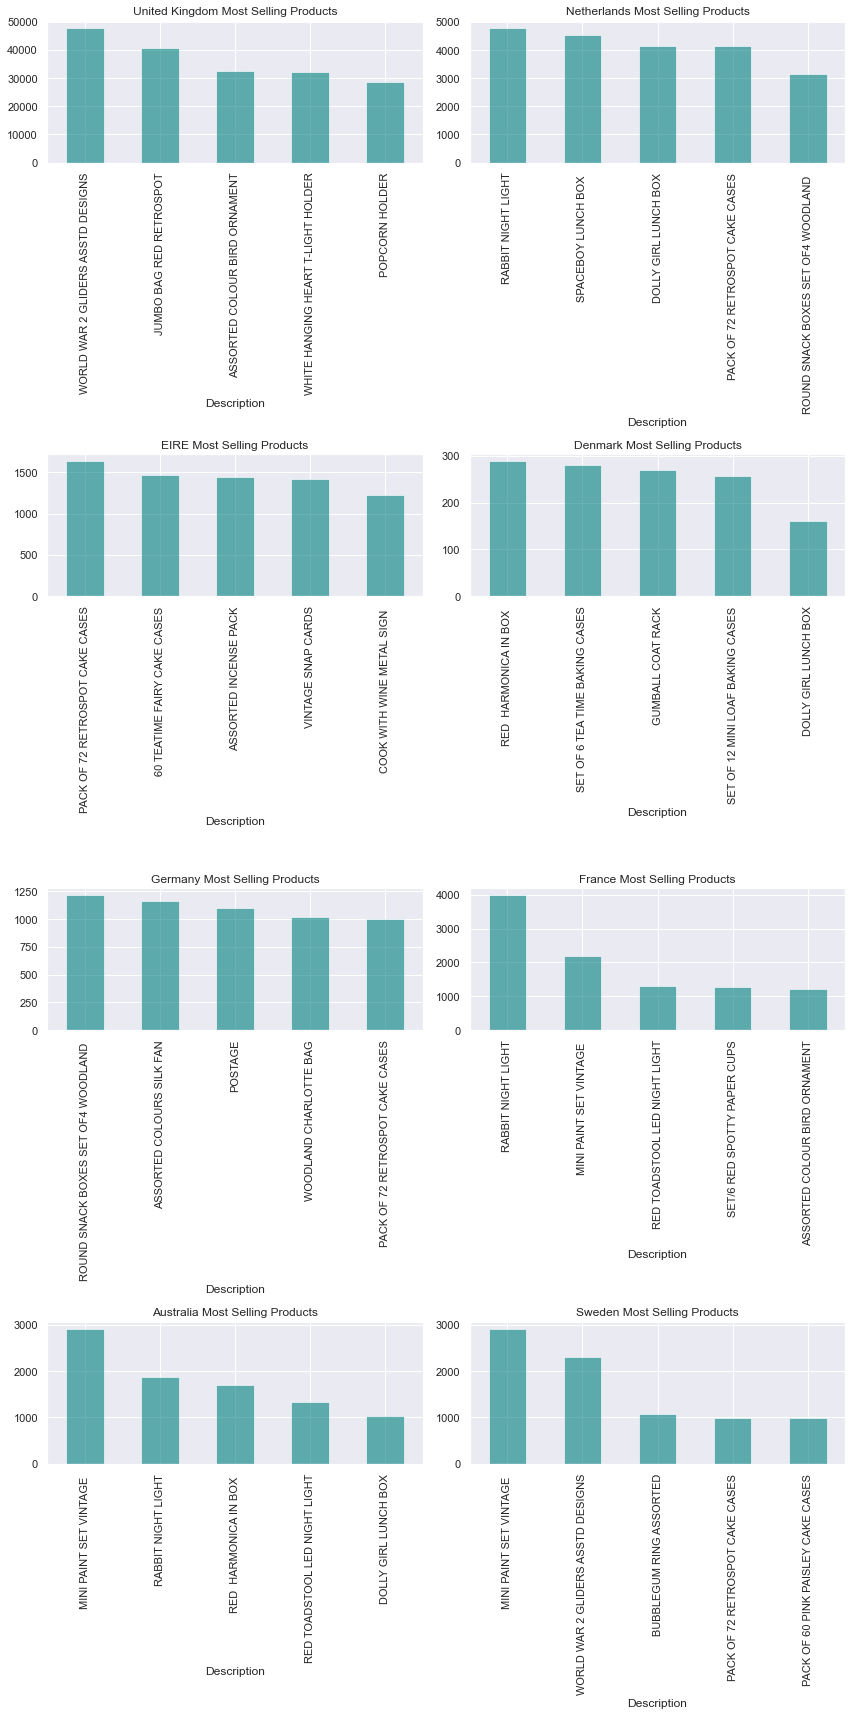

In [47]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

#### Bottom 5 Countries with Mostly Purchased Products

In [48]:
least_5_country = ["Saudi Arabia", "Lebanon", "European Community", "Brazil", "Czech Republic"]

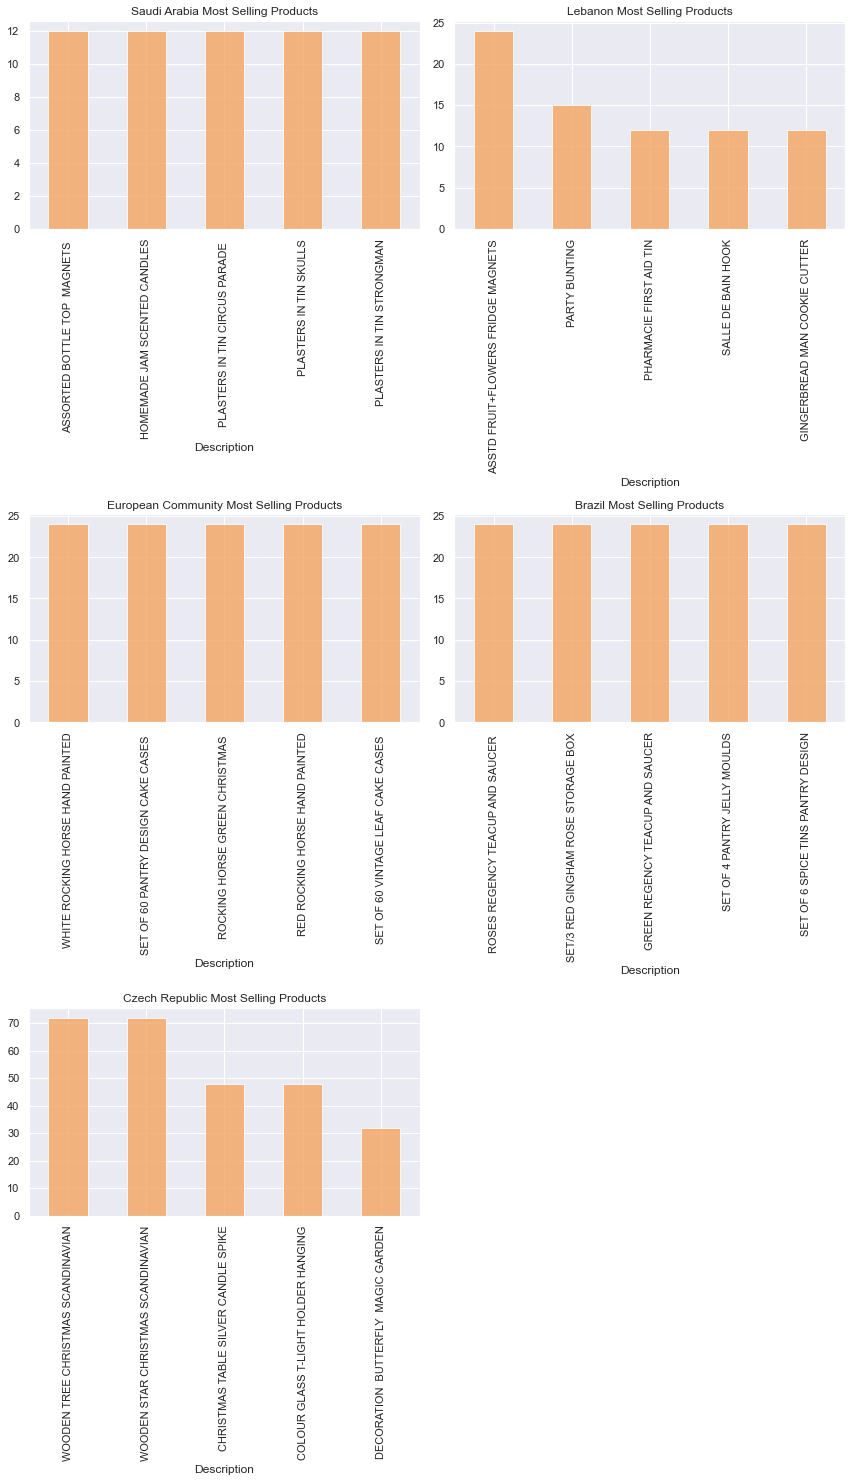

In [49]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_5_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    
    plt.tight_layout()

#### EDA INSIGHTS:
1) Our Top 5 Best Selling Products are World War 2 Gliders, White Hanging Heart, Assorted Colour Bird, Jumbo Bag Red, popcorn holder.

2) Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

3) 2011 is the year in which we have the most transactions followed by the 2010

4) Q4 being the highest when it comes transactions.

5) It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6) People loves to shop on Thursday followed by Tuesday and Wednesday.

#### RFM Estimation - (Recency, Frequency, Monetary)¶
RFM stands for frequency, recency & monetary is a marketing technique which is used to find the best customers by analyzing their past purchasing behavior. It includes how frequently they have purchased, what is the total amount that they have spend so far, what was the last time they have purchased from our online store so on & so fort

In [50]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [51]:
data["Total Amount"] = data["Quantity"]*data["UnitPrice"]

In [52]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Total Amount  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom         15.30  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom         20.34  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom         22.00  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom         20.34  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom         20.34

In [53]:
#which countries did we get the most income from
data.groupby("Country").agg({"Total Amount":"sum"}).sort_values("Total Amount", ascending = False).head()

Total Amount
Country                     
United Kingdom  6.767873e+06
Netherlands     2.846615e+05
EIRE            2.502852e+05
Germany         2.216982e+05
France          1.967128e+05

In [54]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [55]:
data['InvoiceDate'].describe()

count                  406829
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [56]:
data["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [57]:
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [58]:
#to make the assessment easier, today's date is set as January 1, 2012.  
today = pd.datetime(2012,1,1) 
today

datetime.datetime(2012, 1, 1, 0, 0)

In [59]:
#changing the data type of the order date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [60]:
#taking values greater than 0, this will be easier in terms of evaluation
df = data[data['Quantity'] > 0]
df = data[data['Total Amount'] > 0]

In [61]:
df.dropna(inplace = True) #removal of observation units with missing data from df

In [62]:
#size information
df.shape

(397884, 9)

#### Finding RFM Score¶
RFM consists of Recency, Frequency, Monetary initials of expressions.

It is a technique that helps determine marketing and sales strategies based on buying habits of customers.

Recency: Time since customer last purchase

Frequency: Total number of purchases.

Monetary: Total spending by the customer.

In [63]:
# finding Recency and Monetary values.
df_x = data.groupby('CustomerID').agg({'Total Amount': lambda x: x.sum(), #monetary value
                                        'InvoiceDate': lambda x: (today - x.max()).days}) #recency value
#x.max()).days; last shopping date of customers

In [64]:
df_y = df.groupby(['CustomerID','InvoiceNo']).agg({'Total Amount': lambda x: x.sum()})
df_z = df_y.groupby('CustomerID').agg({'Total Amount': lambda x: len(x)}) 
#finding the frequency value per capita

In [65]:
#creating the RFM table
rfm_table= pd.merge(df_x,df_z, on='CustomerID')

In [66]:
#determination of column names
rfm_table.rename(columns= {'InvoiceDate': 'Recency',
                          'Total Amount_y': 'Frequency',
                          'Total Amount_x': 'Monetary'}, inplace= True)

In [67]:
rfm_table.head()

Monetary  Recency  Frequency
CustomerID                              
12346           0.00      347        1.0
12347        4310.00       24        7.0
12348        1797.24       97        4.0
12349        1757.55       40        1.0
12350         334.40      332        1.0

In [68]:
#RFM score values 
rfm_table['RecencyScore'] = pd.qcut(rfm_table['Recency'],5,labels=[5,4,3,2,1])
rfm_table['FrequencyScore'] = pd.qcut(rfm_table['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_table['MonetaryScore'] = pd.qcut(rfm_table['Monetary'],5,labels=[1,2,3,4,5])

In [69]:
#RFM score values are combined side by side in str format
(rfm_table['RecencyScore'].astype(str) + 
 rfm_table['FrequencyScore'].astype(str) + 
 rfm_table['MonetaryScore'].astype(str)).head()

CustomerID
12346    111
12347    555
12348    244
12349    414
12350    112
dtype: object

In [70]:
#calculation of the RFM score
rfm_table["RFM_SCORE"] = rfm_table['RecencyScore'].astype(str) + rfm_table['FrequencyScore'].astype(str) + rfm_table['MonetaryScore'].astype(str)

In [71]:
rfm_table.head()

Monetary  Recency  Frequency RecencyScore FrequencyScore  \
CustomerID                                                             
12346           0.00      347        1.0            1              1   
12347        4310.00       24        7.0            5              5   
12348        1797.24       97        4.0            2              4   
12349        1757.55       40        1.0            4              1   
12350         334.40      332        1.0            1              1   

           MonetaryScore RFM_SCORE  
CustomerID                          
12346                  1       111  
12347                  5       555  
12348                  4       244  
12349                  4       414  
12350                  2       112

#### transposition of the RFM table. This makes it easier to evaluate.

In [72]:
#customers with RFM Score 555
rfm_table[rfm_table["RFM_SCORE"] == "555"].head()

Monetary  Recency  Frequency RecencyScore FrequencyScore  \
CustomerID                                                             
12347        4310.00       24        7.0            5              5   
12362        5154.58       25       10.0            5              5   
12417        3578.80       25        9.0            5              5   
12433       13375.87       22        7.0            5              5   
12437        4896.66       23       18.0            5              5   

           MonetaryScore RFM_SCORE  
CustomerID                          
12347                  5       555  
12362                  5       555  
12417                  5       555  
12433                  5       555  
12437                  5       555

In [73]:
#customers with RFM Score 111
rfm_table[rfm_table["RFM_SCORE"] == "111"].head()

Monetary  Recency  Frequency RecencyScore FrequencyScore  \
CustomerID                                                             
12346            0.0      347        1.0            1              1   
12353           89.0      226        1.0            1              1   
12361          189.9      309        1.0            1              1   
12401           84.3      325        1.0            1              1   
12402          225.6      345        1.0            1              1   

           MonetaryScore RFM_SCORE  
CustomerID                          
12346                  1       111  
12353                  1       111  
12361                  1       111  
12401                  1       111  
12402                  1       111

#### RFM Customer Segments

Champions - bought recently, buy often and spend the most

Loyal Customers - spend good money and often, responsive to promotions

Potential Loyalist - recent customers, but spent a good amount and bought more than once

New Customers - bought most recently, but not often

Promising - recent shoppers, but haven’t spent much

Needing Attention - above average recency, frequency and monetary values; may not have bought very recently though

About To Sleep - below average recency, frequency and monetary values; will lose them if not reactivated

At Risk - spent big money and purchased often but long time ago; need to bring them back

Can't Loose Them - made biggest purchases, and often but haven’t returned for a long time

Hibernating - last purchase was long back, low spenders and low number of orders

In [74]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Cannot Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [75]:
#creation of segment variable
rfm_table['Segment'] = rfm_table['RecencyScore'].astype(str) + rfm_table['FrequencyScore'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

In [76]:
rfm_table.head()

Monetary  Recency  Frequency RecencyScore FrequencyScore  \
CustomerID                                                             
12346           0.00      347        1.0            1              1   
12347        4310.00       24        7.0            5              5   
12348        1797.24       97        4.0            2              4   
12349        1757.55       40        1.0            4              1   
12350         334.40      332        1.0            1              1   

           MonetaryScore RFM_SCORE      Segment  
CustomerID                                       
12346                  1       111  Hibernating  
12347                  5       555    Champions  
12348                  4       244      At Risk  
12349                  4       414    Promising  
12350                  2       112  Hibernating

In [77]:
rfm_table[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
About to Sleep        73.472464   345   1.168116   345   438.586348   345
At Risk              172.424242   594   2.880471   594   944.206618   594
Cannot Lose          149.553846    65   8.307692    65  2745.479846    65
Champions             26.989214   649  12.223421   649  6647.841171   649
Hibernating          236.419962  1062   1.097928  1062   402.366574  1062
Loyal Customers       53.565000   800   6.523750   800  2671.081939   800
Need Attention        71.333333   186   2.311828   186   809.068065   186
New Customers         27.847826    46   1.000000    46   384.548913    46
Potential Loyalists   37.443320   494   1.997976   494   694.911498   494
Promising             44.340206    97   1.000000    97   306.802887    97

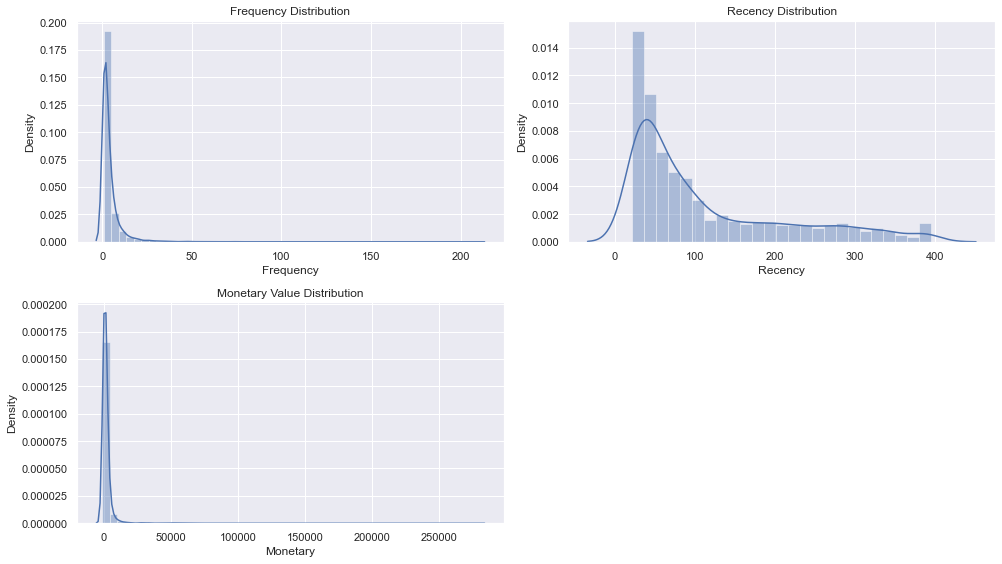

In [78]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_table["Frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_table["Recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_table["Monetary"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

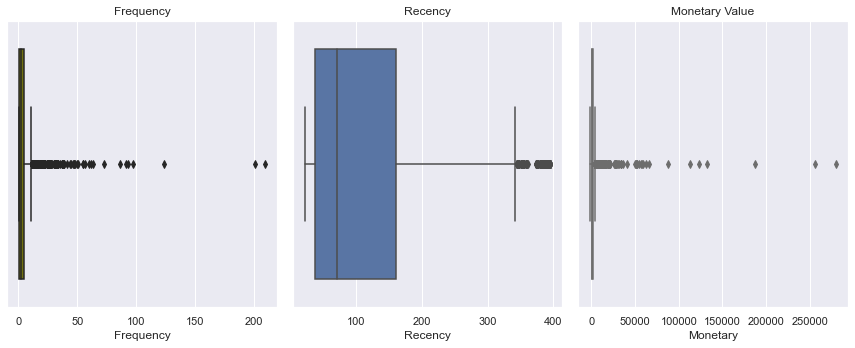

In [79]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_table["Frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_table["Recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_table["Monetary"], color = "salmon")
plt.title("Monetary Value")
plt.tight_layout()

In [80]:
rfm_table[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
About to Sleep        73.472464   345   1.168116   345   438.586348   345
At Risk              172.424242   594   2.880471   594   944.206618   594
Cannot Lose          149.553846    65   8.307692    65  2745.479846    65
Champions             26.989214   649  12.223421   649  6647.841171   649
Hibernating          236.419962  1062   1.097928  1062   402.366574  1062
Loyal Customers       53.565000   800   6.523750   800  2671.081939   800
Need Attention        71.333333   186   2.311828   186   809.068065   186
New Customers         27.847826    46   1.000000    46   384.548913    46
Potential Loyalists   37.443320   494   1.997976   494   694.911498   494
Promising             44.340206    97   1.000000    97   306.802887    97

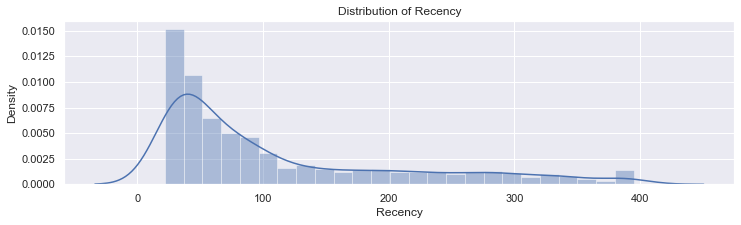

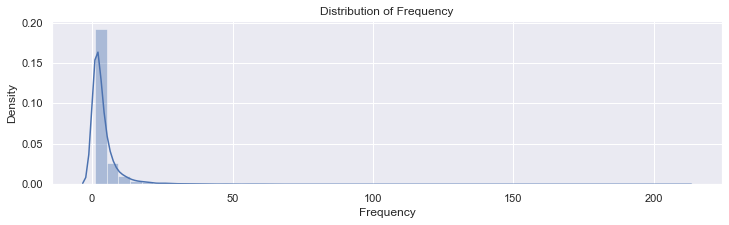

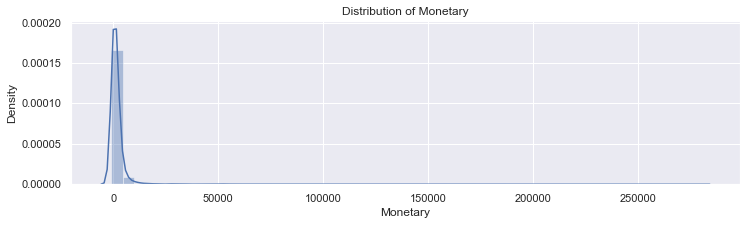

In [81]:
colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm_table[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

#### Remarks
3 segments selected for evaluation are "Cannot Lose", "Hibernating" and "Champions".

Number of customers for segments:

Cannot Lose = 65, Hibernating = 1062, Champions = 649

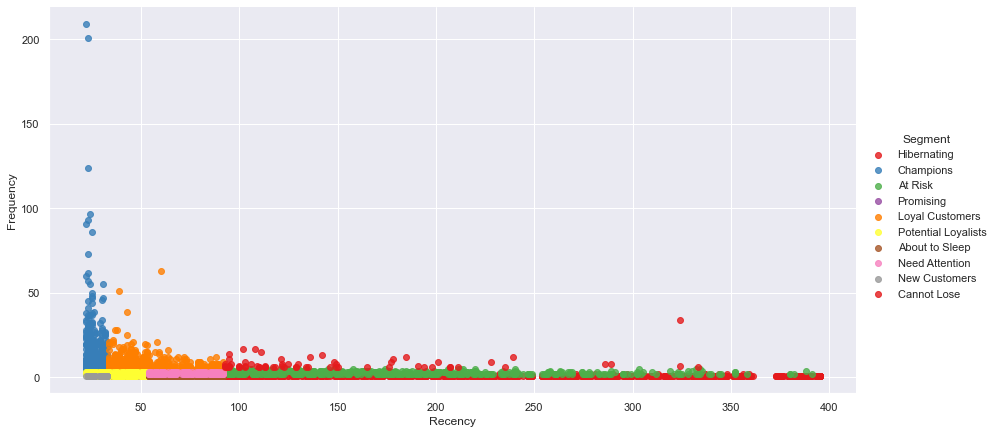

In [82]:
dist = rfm_table[rfm_table.Frequency < 2000 ] # as most of the frequency value is less than 2000 

sns.lmplot(x = 'Recency', y = 'Frequency', hue = 'Segment', data = dist, palette = 'Set1', fit_reg = False, height = 6, aspect = 2)

In [83]:
import squarify

ModuleNotFoundError: No module named 'squarify'

In [84]:
!pip install squarify

In [85]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm_table.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency Monetary      
                       mean      mean     mean count
Segment                                             
About to Sleep         73.5       1.2    438.6   345
At Risk               172.4       2.9    944.2   594
Cannot Lose           149.6       8.3   2745.5    65
Champions              27.0      12.2   6647.8   649
Hibernating           236.4       1.1    402.4  1062
Loyal Customers        53.6       6.5   2671.1   800
Need Attention         71.3       2.3    809.1   186
New Customers          27.8       1.0    384.5    46
Potential Loyalists    37.4       2.0    694.9   494
Promising              44.3       1.0    306.8    97

In [86]:
rfm_level_agg.index.tolist()

['About to Sleep',
 'At Risk',
 'Cannot Lose',
 'Champions',
 'Hibernating',
 'Loyal Customers',
 'Need Attention',
 'New Customers',
 'Potential Loyalists',
 'Promising']

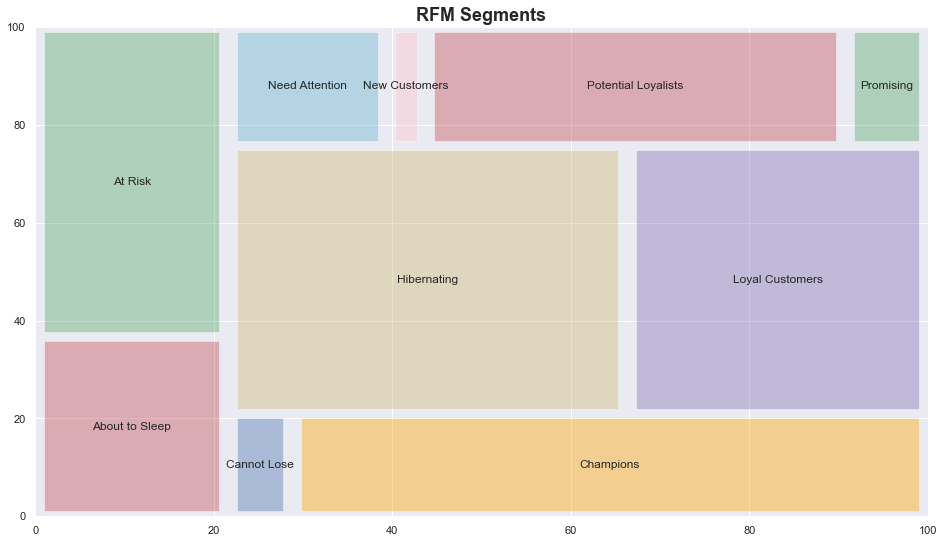

In [88]:
import squarify
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=rfm_level_agg.index.tolist(), alpha=0.4, pad=0.1, color=['r', 'g', 'b', 'orange', 'y', 'm', 'c', 'pink'] )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis()
plt.savefig('RFM Segments.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

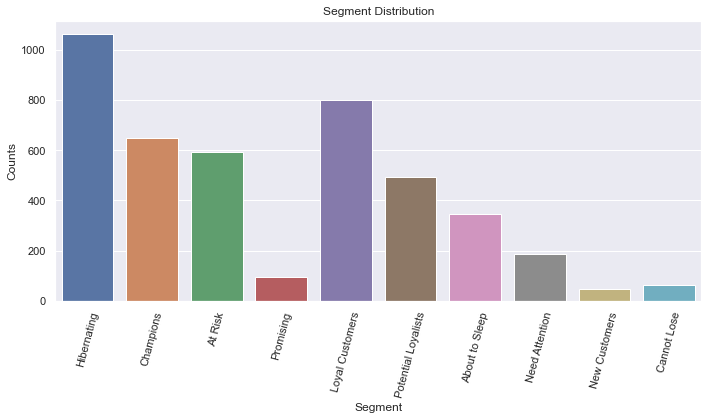

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(rfm_table['Segment'])
plt.ylabel('Counts')
plt.xticks(rotation = 75)
plt.title('Segment Distribution', size=12)
plt.tight_layout()
plt.savefig('Distribution of Segments 2.jpeg',
            pil_kwargs={'quality': 95,'papertype':'letter'});

### K-Means Clustering

In [90]:
rfm_kmeans = rfm_table[['Recency','Frequency', 'Monetary']]

### K-Values and Clustering

In [91]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

import matplotlib.cm as cm

import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots

import warnings 
warnings.filterwarnings("ignore")

from sklearn.metrics import silhouette_score

from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples

#Data Scalling
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,MaxAbsScaler
import datetime as dt

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

In [92]:
k = range(1, 15)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(rfm_kmeans)
    inertia.append(model.inertia_)

print(k)
print(inertia)


range(1, 15)
[295149802410.1478, 99904172157.11494, 49096472341.98742, 30150511628.299397, 17780877214.109875, 11602141374.857172, 8402737050.049187, 5450659264.661448, 4014449818.740027, 3092002131.866116, 2379933264.019541, 1924596700.014316, 1661891853.2649229, 1439178709.120698]


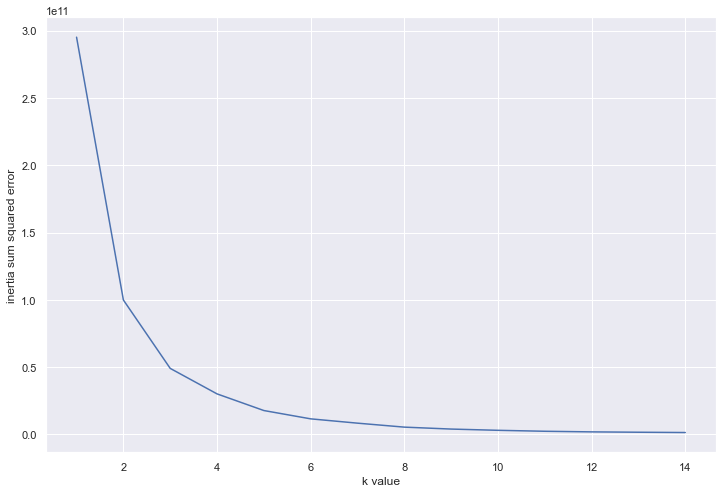

In [93]:
plt.figure(figsize=(12,8))
plt.plot(k, inertia) # Untuk melihat pada sikut dalam plot
plt.xlabel('k value')
plt.ylabel('inertia sum squared error');

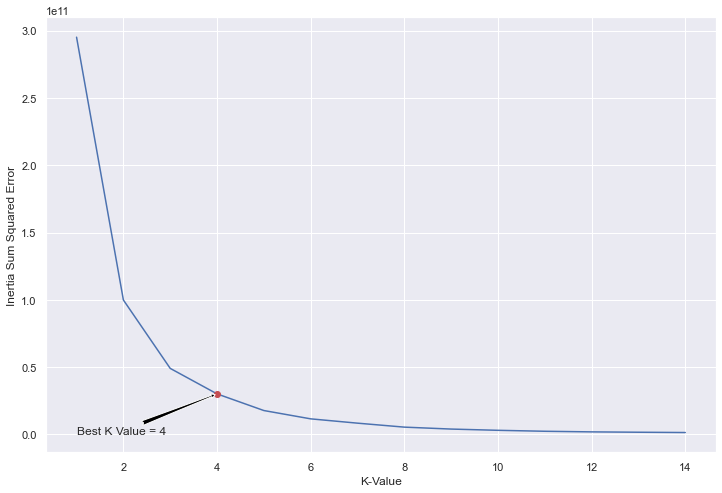

In [94]:
plt.figure(figsize=(12,8))
plt.plot(k, inertia)
plt.xlabel('K-Value')
plt.ylabel('Inertia Sum Squared Error')
plt.plot(k[3], inertia[3], 'ro')
plt.annotate(
    'Best K Value = 4', xy=(k[3], inertia[3]),
    xytext = (1, 20), arrowprops = dict(arrowstyle='fancy',facecolor='black'));

#### Using 4 Cluster

In [95]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=100, max_iter=10000, algorithm='full')
kmeans.fit(rfm_kmeans)
pred = kmeans.predict(rfm_kmeans)

In [96]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

#### Silhouette Score

In [98]:
from sklearn.metrics import silhouette_score
score = silhouette_score(rfm_kmeans, kmeans.labels_)
print("Silhoutte Score = ", round(score,2)*100, '%')

Silhoutte Score =  88.0 %


In [99]:
db,slc = {}, {}
for k in range(2, 8):
    # seed of 10 for reproducibility.
    kmeans_normal = KMeans(n_clusters=k, init='k-means++' ,max_iter=10000,random_state=42).fit(rfm_kmeans)
    clusters = kmeans_normal.labels_
    db[k] = davies_bouldin_score(rfm_kmeans,clusters)
    slc[k] = silhouette_score(rfm_kmeans,clusters)

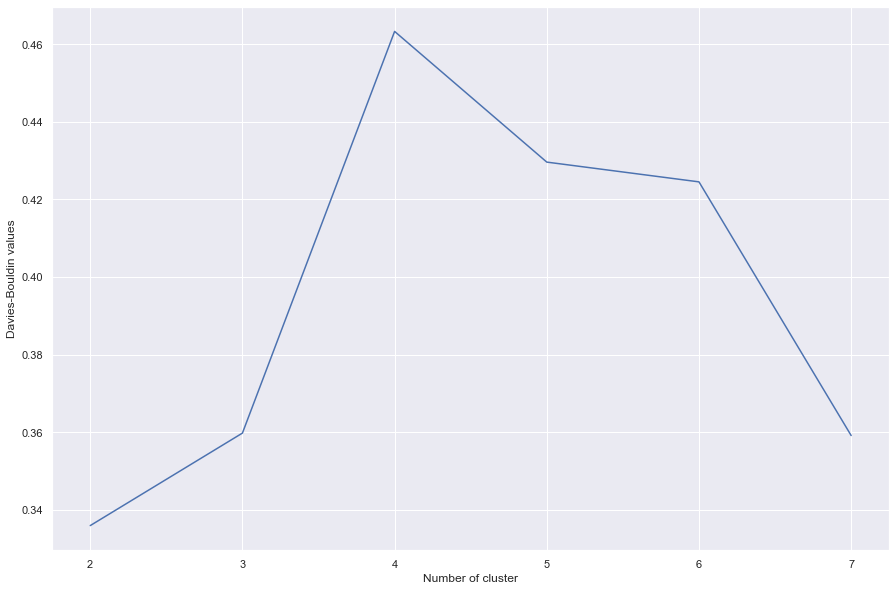

In [100]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

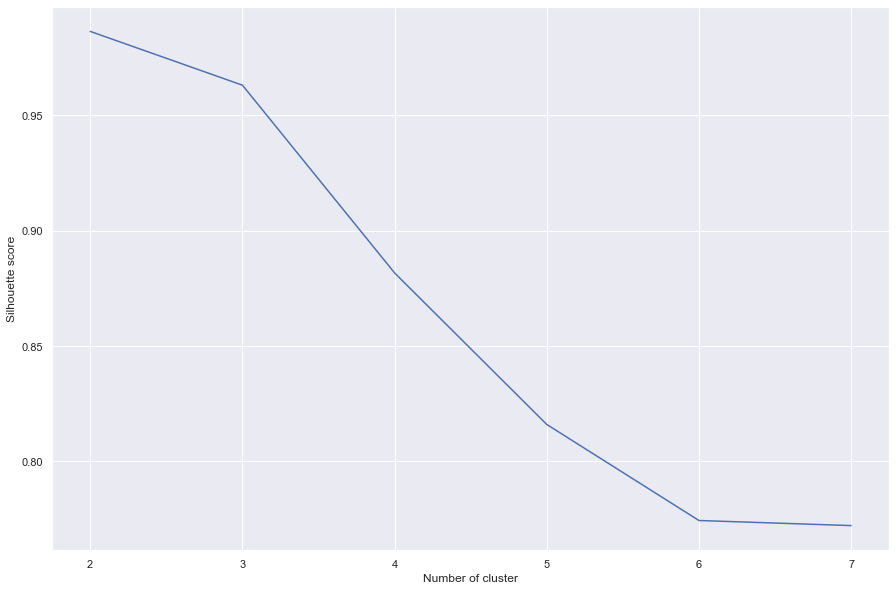

In [101]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [102]:
pd.Series(pred).value_counts()

1    4218
0     102
3      15
2       3
dtype: int64

#### Scaling Log: K-Values and Clustering

In [103]:
cols = ['Recency', 'Frequency', 'Monetary']

#Generate Feature of Logged value for each Recency, Frequency, and Monetary
for i in cols :
    rfm_kmeans[f'{i}LS'] = np.log(rfm_kmeans[i])

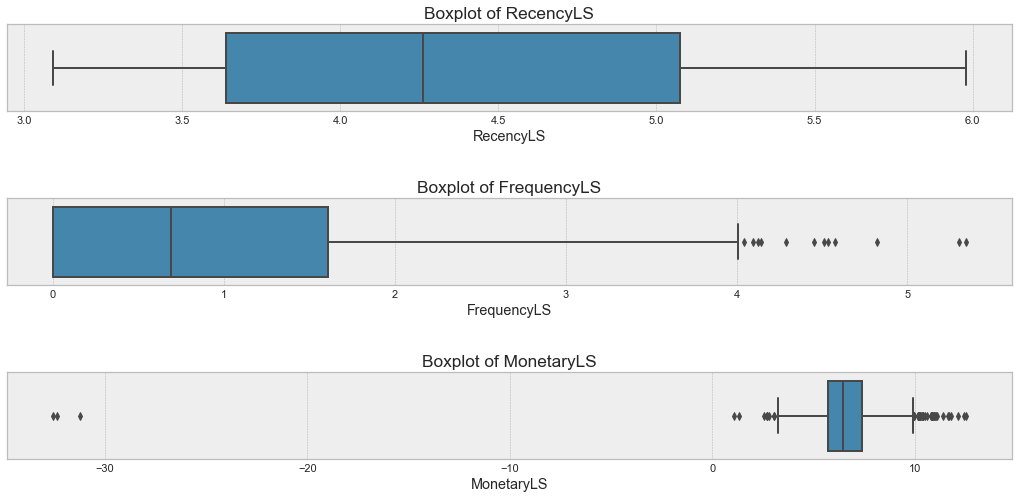

In [104]:
plt.figure(1, figsize=(18,8))

n = 0

for x in ['RecencyLS', 'FrequencyLS', 'MonetaryLS']:
    plt.style.use('bmh')
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = 1)
    sns.boxplot(rfm_kmeans[x])
    plt.title(f"Boxplot of {x}");

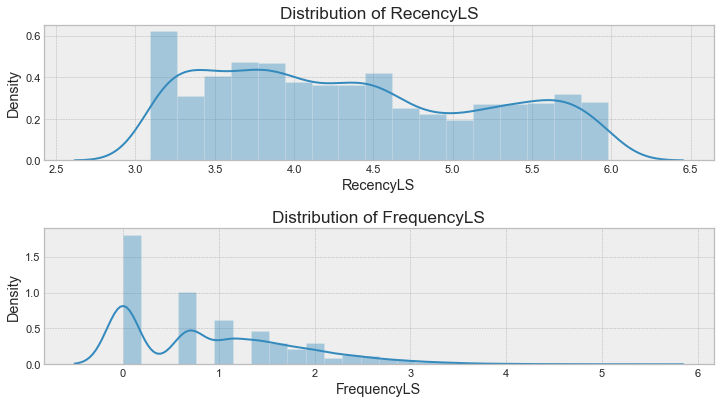

In [105]:
plt.figure(1, figsize=(12,10))

n = 0

for x in ['RecencyLS', 'FrequencyLS']:
    plt.style.use('bmh')
    n += 1
    plt.subplot(3, 1, n)
    plt.subplots_adjust(hspace = .5, wspace = .3)
    sns.distplot(rfm_kmeans[x])
    plt.title(f"Distribution of {x}");